<a href="https://colab.research.google.com/github/PrithuVerma/Exploratory-Data-Analysis/blob/main/AQI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ishankat_real_time_air_quality_index_aqi_india_20232025_path = kagglehub.dataset_download('ishankat/real-time-air-quality-index-aqi-india-20232025')

print('Data source import complete.')


Using Colab cache for faster access to the 'real-time-air-quality-index-aqi-india-20232025' dataset.
Data source import complete.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load dataset

In [8]:
df = pd.read_csv("/content/AQI.csv")
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-05-2025 10:00:00,16.554731,80.649110,SO2,20.0,23.0,21.0
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",19-05-2025 10:00:00,16.554731,80.649110,OZONE,17.0,35.0,22.0
2,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",19-05-2025 10:00:00,17.720000,83.300000,PM10,23.0,66.0,36.0
3,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-05-2025 10:00:00,27.103358,93.679645,NO2,4.0,5.0,5.0
4,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",19-05-2025 10:00:00,27.103358,93.679645,CO,10.0,19.0,12.0


In [9]:
df = df.drop(["country", "latitude", "longitude", "last_update", "station"], axis=1, errors="ignore")
df = df.dropna()

In [10]:
if "AQI" not in df.columns:
    df["AQI"] = df[["pollutant_min", "pollutant_max", "pollutant_avg"]].mean(axis=1)


# Encode all object (categorical) columns

In [11]:
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [12]:
X = df.drop("AQI", axis=1)
y = df["AQI"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}


In [14]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})

results_df = pd.DataFrame(results)

/tmp/ipython-input-366392842.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=results_df, palette="viridis")


Text(0, 0.5, 'R² Score')

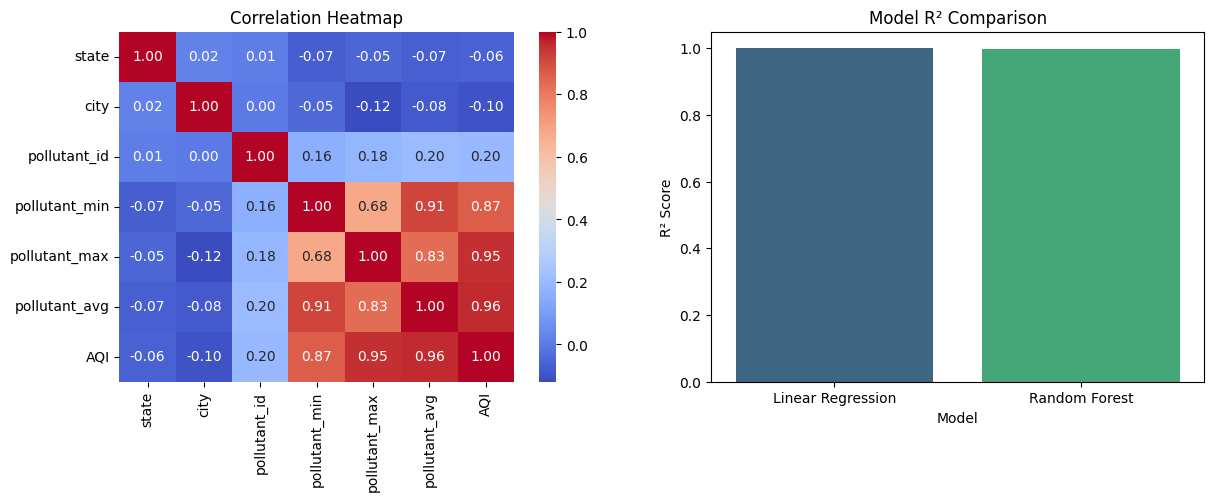

In [15]:
plt.figure(figsize=(14, 10))

# 1. Correlation Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

# 2. Model performance
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="R2", data=results_df, palette="viridis")
plt.title("Model R² Comparison")
plt.ylabel("R² Score")

# 3. Predicted vs Actual (Random Forest)

Text(0.5, 1.0, 'Random Forest: Actual vs Predicted')

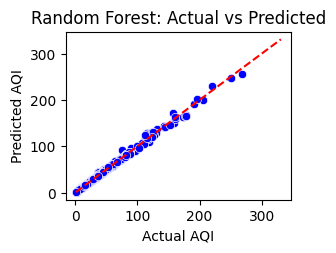

In [16]:

rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(X_test)
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=y_pred_rf, color="blue", edgecolor="w")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest: Actual vs Predicted")

# 4. Error Detection

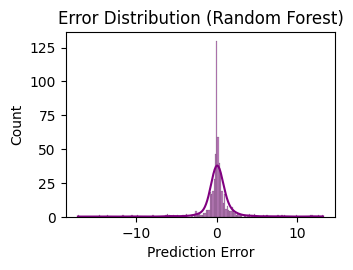

               Model           MAE          RMSE        R2
0  Linear Regression  9.881384e-15  1.317572e-14  1.000000
1      Random Forest  9.943435e-01  2.281552e+00  0.996707


In [17]:
errors = y_test - y_pred_rf
plt.subplot(2, 2, 4)
sns.histplot(errors, kde=True, color="purple")
plt.title("Error Distribution (Random Forest)")
plt.xlabel("Prediction Error")

plt.tight_layout()
plt.show()

print(results_df)